# Graded Lab Assignment: Logistic Regression (10 points)

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignment are distributed as follows:
* The implementation
    - prediction_function (0.5)
    - cost_function (1)
    - compute_gradient (1)
    - correct double for loop (2)
    - correct stop condition (0.5)
    - preventing overfitting (1)
    - systematically choosing learning rate (1) 
    - best score analysis (1)
    - summary (1)
    - comments (0.5)
    - code (0.5)
    

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

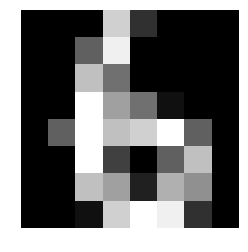

In [192]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])
thirdrow = np.hstack(digits.images[10:15,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
#plt.imshow(np.vstack((firstrow,secondrow, thirdrow)))

plt.imshow(hstack(digits.images[1503:1504,:,:]))

#print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10], digits.target[:5]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3).
(5) Make sure to comment your code!

In [83]:
#Make a prediction function h
def hpred(x,theta):
    # theta = Vector (64, 10), x = Vector (64,n) -> Vector (10,n)
    x_predict = (1 / (1 + (e**-dot(theta.T,x))))
    return x_predict

In [84]:
#Use the output of that function to compute the cost function J:

def cost_function(x_predict,y):
    # Vector (10,1), Vector (10,1) -> Vector (10, 1)
    # number for each class
    #for two classes, since eacht number (n) is classified as n or the others, this cost function works
    cost = y * log(x_predict) + (1 - y) * log(1 - x_predict)
    J = - sum(cost) / size(x_predict)
    return J


In [99]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    # Vector (10,1), Vector(10,1), Vector(64, 1) -> Vector (64, 10)
        dtheta = (outer((x_predict - y), x) / size(x)).T
        return dtheta
    

In [204]:
#Choose a suitable learning rate
alpha = 0.0003
iterations = 1600
theta = zeros((64,10)) # 1 theta per pixel, 64 pixels, for 10 different classes


#print(theta.)
#It is important to check that you're not overfitting by testing your prediction on a testset
x = reshape(digits.images[:1500],(1500,64))

#Training Theta:
for i in range(iterations): 
    for j in range(x.shape[0]): # 1500 examples
                x_predict = hpred(x[j,:],theta)
                y = np.zeros(10)
                y[target[j]] = 1
                cost = cost_function(x_predict,y)
                dtheta = compute_gradient(x_predict, y, x[j, :])
                theta -= alpha * dtheta

#----------------------------------------------------------------------------------------
#Using Theta to test:

target = digits.target[:1500]
target_test = digits.target[1500:]
x_test = reshape(digits.images[1500:],(297,64))

def mainfnct(x, theta):
    #for a new image input, find highest probability and return the index
    return argmax(hpred(x.T, theta))


trainerror = 0
for k in range(x.shape[0]):
    if mainfnct(x[k], theta) != target[k]: #If the guess is not equal to the actual number, add 1 to error
        trainerror += 1
    else:
        pass

print("The accuracy of the trained model on our train set:")
print((1- float(trainerror)/x.shape[0]) * 100)

testerror = 0
for k in range(x_test.shape[0]):
    if mainfnct(x_test[k], theta) != target_test[k]: #If the guess is not equal to the actual number, add 1 to error
        testerror += 1
    else:
        pass

print("The accuracy of the trained model on our test set:")
print((1- float(testerror)/x_test.shape[0]) * 100)


The accuracy of the trained model on our train set:
98.4
The accuracy of the trained model on our test set:
89.5622895623


### Summary:
The function "mainfnct is written to read an [64x1] matrix' containing grayscale values that represent the 8x8 images of 0-9 numbers, and returns the value of the numbers with a 90.24% accuracy.

#### How it works:
This model is trained on 1500 images represented by 64 pixels in a 1x64 array. A [64,10] matrix $\theta$ is constructed, and through **n** itterations of the 1500 matrices (**x**) all 64 pixels of the 10 numbers (0-9) gets a $\theta_i$ value.

After the matrix $\theta$ is trained, $\theta$ gets used in the prediction function (**hpred**) represented by the mathematic equation:
$h_{\theta}(x)=\frac{1}{1 + e^{-\theta^T \cdot x}}$ which returns a probability vector of dimensions [10,1] where probability i represents the probability *x* is the matrix belonging to the $i$-th number.

The function **cost_function** was created for the exercise but since there seems to be barely any under or over fitting I felt it was unnecessary to test it.

the function **compute_gradient** is one part of the gradient descent method used to optimize $\theta$. Depending on the size of $\alpha$ and the itterations in the double forloop, theta (preferably) converges to the optimal $\theta$.

**mainfnct** takes a [64x1] matrix and the final $\theta$ and calculates the probability of all 10 numbers throuhg *hpred*. afterwards it returns the index of the highest probability in vector.

To figure out the training- and testerror I used two loops which itterate over the length of the arrays (x, x_train resp.).
Each loop it evaluates an input matrix [64x1] and returns a guess using **mainfnct**, after which it is compared to the real value. If **mainfnct** is incorrect it adds one to the error tally. After the loops the results are printed:  $E = (1 - \frac{error}{number loops}) * 100 $

**Note:** I chose to remove the while statement with the **stopcondition** from the forloops as it messed with my matrix computations, and it did not seem necessary. This also means that my cost function is not really used in any functions.

### Results
Varying the amount of itterations (**n**) and/or $\alpha$ while training $\theta$ changes the efficiency of the model.
A small $\alpha$ converges slowly, but does not overshoot, so a low $\alpha$ and a higher *n* produce the most reliable model.

I found that $\alpha = 0.001$ gave me the best results.
Paired with $n = 800$ it gave me a test accuracy of **90.24%** 

| Itterations:  |  25 |  100| 400 | 800  |1600|
|---|---|---|---|---|---|
| trained model  | 95.33  | 97.33  |  98.13 |  98.66 | 99.26  |
|  tested model | 87.88  | 88.55  | 89.56  | **90.24**  | 89.90  |
<p style="text-align: center;" markdown="8">Figure 1: different number of itterations at $\alpha$ = 0.001</p>


bigger $\alpha$ requires less itterations, so I also tested some other combinations such as:
* $\alpha = 0.1, n = 10$ ---> trainerror: 92.67, testerror: 80.13
* $\alpha = 0.1, n = 100$ ---> trainerror: 97.20, testerror: 83.83
* $\alpha = 0.1, n = 800$ ---> trainerror: 98.12, testerror: 85.86
* $\alpha = 0.03, n = 800$ ---> trainerror: 99.27, testerror: 87.54
* $\alpha = 0.01, n = 800$ ---> trainerror: 99.53, testerror: 87.54
* $\alpha = 0.003, n = 800$ ---> trainerror: 99.33, testerror: 89.56
* $\alpha = 0.001, n = 800$ ---> trainerror: 98.66, testerror: **90.24**
* $\alpha = 0.0003, n = 800$ ---> trainerror: 97.87, testerror: 89.56
* $\alpha = 0.0003, n = 1600$ ---> trainerror: 98.4, testerror: 89.56
